# SimSplit Vision - Dilation Kernels Notebook

Here we explore different dilation kernels for line segmentation. The shape of the kernel `K` greatly defines  
the edges of the text boxes and hence affects the OCR.

We assume a kernel `K(i, j)` with `i=5`:

- The width of the text box scales with `j`.
- The number of text boxes detected decreases as `j` increases.
- As the `j` increases, the computational time of the OCR decreases (due to less text boxes)
- As `j` decreases, noise also decreases, less area is covered per box, an
- As `j` decreases, a larger number of row pairs are detected, and a more robust parser will be required.

**Note**: For smaller resolution images (impractically small, that is, both `i` and `j` should be scaled down.  
Example is show near the end of the notebook.


---
## Setup

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,12)

In [10]:
os.getcwd()

'/home/yanal/Desktop/Workspace/SimSplit/vision/notebooks'

---
## Image Pre-processing

In [13]:
img = cv2.imread('kernel_data/bin1.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

Text(0.5, 1.0, 'Thresholded Binary')

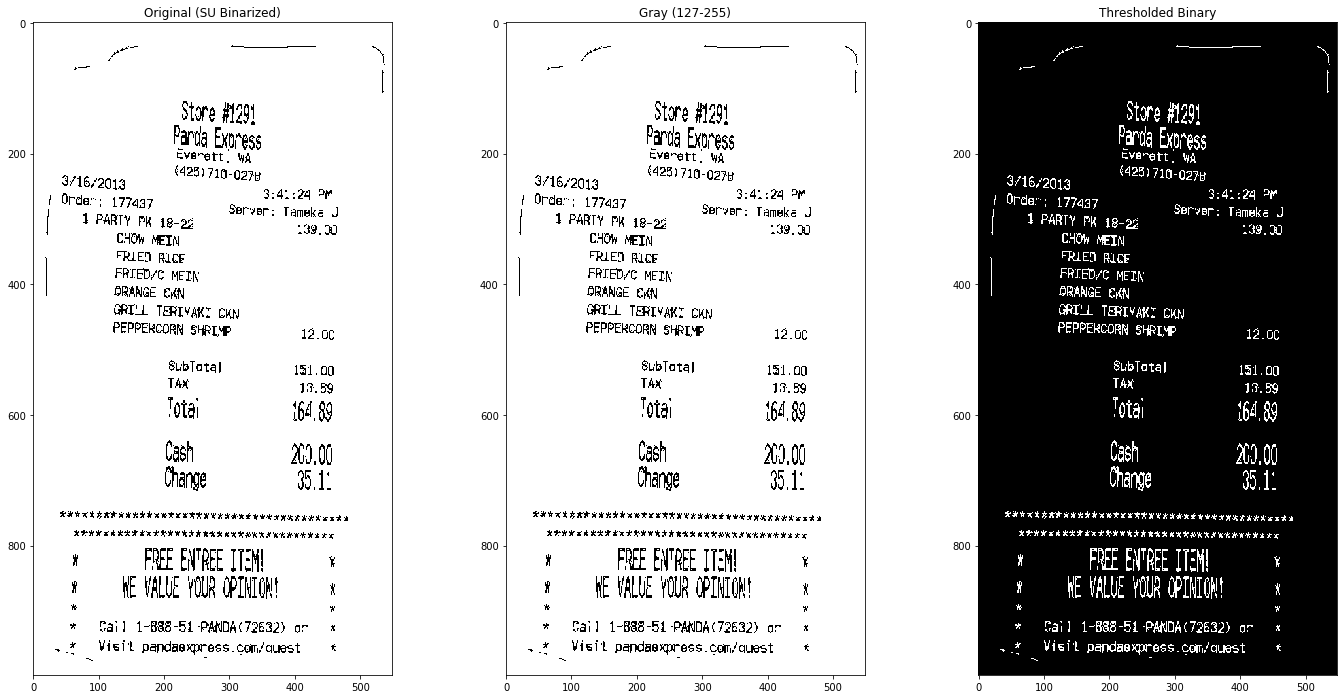

In [56]:
fig, ax = plt.subplots(1, 3)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original (SU Binarized)')

ax[1].imshow(img_gray, cmap='gray') 
ax[1].set_title('Gray (127-255)')

ax[2].imshow(thresh, cmap='gray')
ax[2].set_title('Thresholded Binary')

---
## Comparison of Dilation Kernels

In [40]:
I = [3, 5]
J = [30, 50, 100]

kernels = []
dilations = []

for i in I:
    for j in J:
        # Perform dilation
        kernel = np.ones((i, j), np.uint8)
        # img_dilation = cv2.dilate(gray, kernel, iterations=1)
        dilation = cv2.dilate(thresh, kernel, iterations=1)
        kernels.append((i, j))
        dilations.append(dilation)

In [41]:
kernels

[(3, 30), (3, 50), (3, 100), (5, 30), (5, 50), (5, 100)]

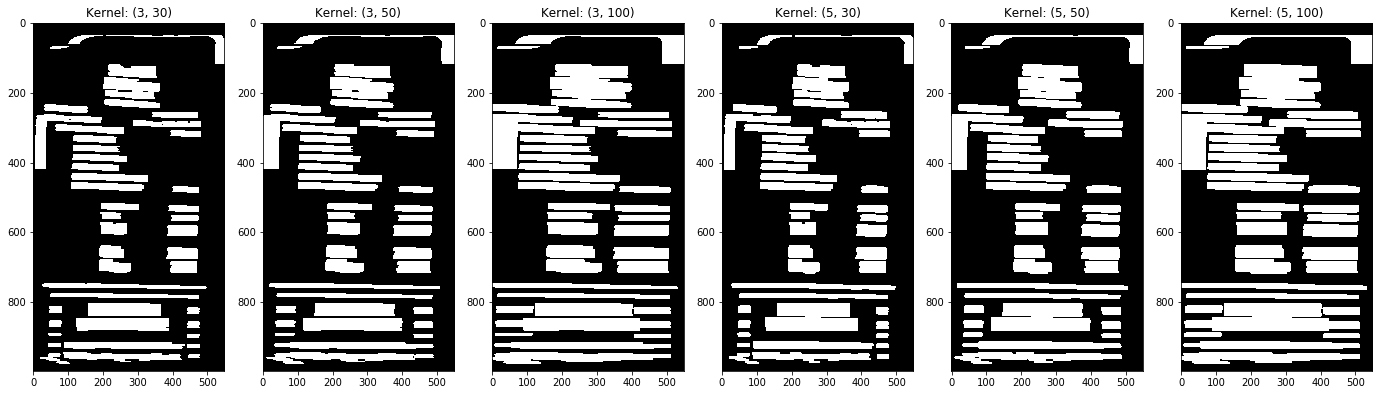

In [54]:
fig, ax = plt.subplots(1,6)

for i in range(6):
    ax[i].imshow(dilations[i], cmap='gray')
    ax[i].set_title(f"Kernel: {kernels[i]}")

---
## Final Text Boxes

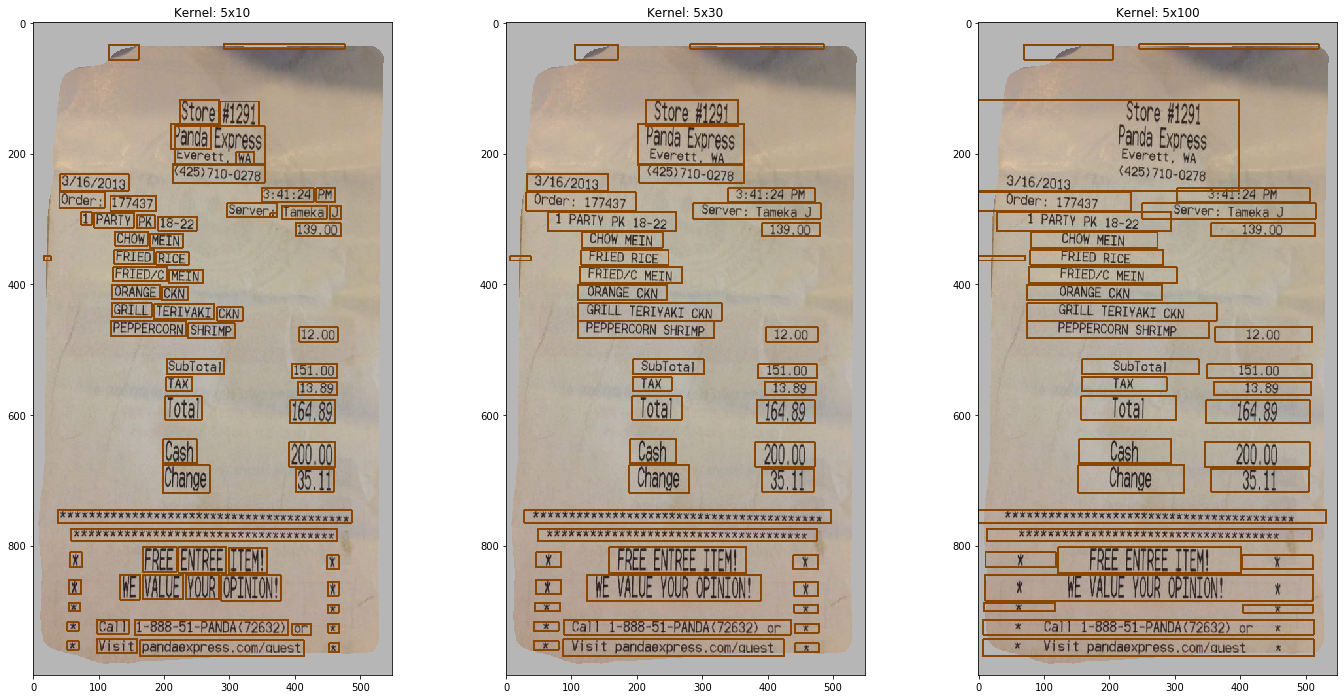

In [55]:
fig, ax = plt.subplots(1, 3)

img_x10 = cv2.imread('kernel_data/5x10.png')
img_x30 = cv2.imread('kernel_data/5x30.png')
img_x100 = cv2.imread('kernel_data/5x100.png')

kernels = ['5x10', '5x30', '5x100']
images = [img_x10, img_x30, img_x100]

for i in range(3):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(f"Kernel: {kernels[i]}")

---
## Kernel scaling for small resolutions

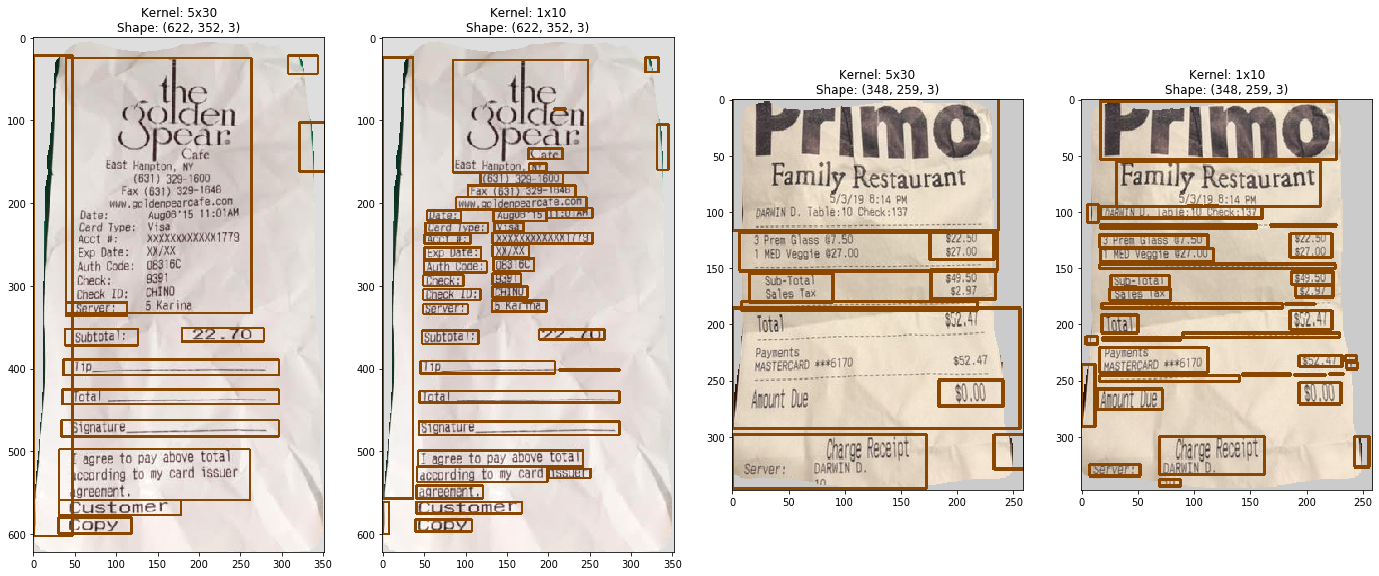

In [14]:
fig, ax = plt.subplots(1, 4)

img1_1x10 = cv2.imread('kernel_data/line_seg/1x10_lowres_1.png')
img2_1x10 = cv2.imread('kernel_data/line_seg/1x10_lowres_2.png')
img1_5x30 = cv2.imread('kernel_data/line_seg/5x30_lowres_1.png')
img2_5x30 = cv2.imread('kernel_data/line_seg/5x30_lowres_2.png')

kernels = ['5x30', '1x10', '5x30', '1x10']
images = [img1_5x30, img1_1x10, img2_5x30, img2_1x10]

for i in range(4):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(f"Kernel: {kernels[i]}\nShape: {images[i].shape}")

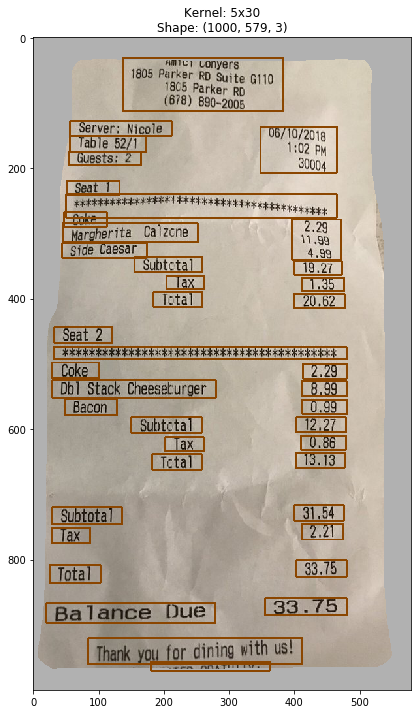

In [19]:
image = cv2.imread('kernel_data/line_seg/5x30_highres_1.png')
kernel = '5x30'

plt.title(f"Kernel: {kernel}\nShape: {image.shape}")
plt.imshow(image, cmap='gray')


---